<h1 align="center">Volume 2: The Fourier Transform.</h1>


<h2 align="center">Part 1: The Discrete Fourier Transform</h2>

In [1]:
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft,ifft,fft2,ifft2
import numpy as np
import IPython
from scipy.signal import fftconvolve
import imageio

In [2]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3)      # Change plot size / aspect (you may adjust this).

In [3]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1.1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        #store attributes
        self.rate = rate
        self.samples = samples

    # Problems 1.1 and 1.7
    def plot(self, boolean=False):
        """Plot the graph of the sound wave (time versus amplitude)."""
        x = len(self.samples)/self.rate #compute the total seconds
        #create domain on number of seconds divided into number of samples
        domain = np.linspace(0,x,len(self.samples)) 
        if boolean:
            plt.subplot(222) #plot the dft
            dftsamples = np.abs(fft(self.samples))
            time = np.linspace(0,self.rate/2,len(self.samples)//2)
            plt.plot(time,dftsamples[:len(dftsamples)//2])
            plt.title('DFT of Sound Wave')
        
        #plot the wave
        plt.subplot(221)
        plt.ylim((-32768,32767))
        plt.plot(domain,self.samples)
        plt.title('Plot of the Wave')
        plt.ylabel('Samples')
        plt.xlabel('Time (Seconds)')
        plt.show()
    



    # Problem 1.2
    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        scaled_samples = self.samples 
        # check for type and force
        if force or type(self.samples[0]) is not np.int16:
            scaled_samples = ((self.samples/np.max(self.samples))*32767).astype(np.int16)
        #write to wavfile
        wavfile.write(filename, self.rate, scaled_samples)
    
    # Problem 1.4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        if len(self.samples) != len(other.samples): #check if same size
            raise ValueError('SoundWave objects must be the same length')
        else: #return sound wave
            return SoundWave(self.rate,self.samples + other.samples)


    # Problem 1.4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        if self.rate != other.rate: #check if same rate
            raise ValueError('SoundWave objects must be the same length')
        else: #return sound wave
            rshift = np.hstack((self.samples, other.samples))
            return SoundWave(self.rate,rshift)
    
    # Problem 2.1
    def __mul__(self, other):
        """Convolve the samples from two SoundWave objects using circular convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        if self.rate != other.rate: #check if rates are equal
            raise ValueError('Rates are not equal')

        self_samples = self.samples
        other_samples = other.samples
        
        # check if they are the same length
        if len(self.samples) < len(other.samples):
            diff = len(other.samples) - len(self.samples)
            self_samples = np.append(self.samples, np.zeros(diff)) #append zeros
            other_samples = other.samples
        elif len(self.samples) > len(other.samples):
            diff = len(self.samples) - len(other.samples)
            self_samples = self.samples
            other_samples = np.append(other.samples, np.zeros(diff)) #append zeros
        # compute the convolution
        conv = ifft((fft(self_samples))*(fft(other_samples))).real
        return SoundWave(self.rate,conv)

    # Problem 2.2
    def __pow__(self, other):
        """Convolve the samples from two SoundWave objects using linear convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        if self.rate != other.rate: #check if rates are equal
            raise ValueError('Rates are not equal')
        
        n,m = len(self.samples),len(other.samples)
        i = 0

        # compute power of 2 greater than or equal to n+m-1
        while 2**i < n + m - 1:
            i += 1
        length = 2**i

        # make each sample the same length as power of 2
        self_samples = np.append(self.samples,np.zeros(length - n))
        other_samples = np.append(other.samples,np.zeros(length - m))

        #compute the convolution
        conv = ifft((fft(self_samples))*(fft(other_samples))).real

        return SoundWave(self.rate,conv[:n + m - 1]) #only return the first n+m-1


    # Problem 2.4
    def clean(self, low_freq, high_freq):
        """Remove a range of frequencies from the samples using the DFT. 

        Parameters:
            low_freq (float): Lower bound of the frequency range to zero out.
            high_freq (float): Higher boound of the frequency range to zero out.
        """
        n = len(self.samples)
        DFT = fft(self.samples)

        # find the k indices
        k_low = int(low_freq * n / self.rate)
        k_high = int(high_freq * n / self.rate)

        # set appropriate frequencies to zero
        DFT[k_low:k_high] = np.zeros(k_high - k_low)
        DFT[n-k_high:n-k_low] = np.zeros(n-k_low - (n - k_high))

        self.samples = ifft(DFT)
        return SoundWave(self.rate,ifft(DFT))


### Problem 1.1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use the `scipy.io.wavfile.read()` and the `SoundWave` class to plot `tada.wav`.

In [4]:
rate, samples = wavfile.read('tada.wav')
wave = SoundWave(rate, samples) #generate object

wave.plot()


FileNotFoundError: [Errno 2] No such file or directory: 'tada.wav'

### Problem 1.2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and new versions of `tada.wav` in the notebook.

In [5]:
wave.export('tada2.wav')
wave.export('tada3.wav',force=True) #export

NameError: name 'wave' is not defined

In [6]:
IPython.display.Audio(filename='tada2.wav')

In [7]:
IPython.display.Audio(filename='tada3.wav')

### Problem 1.3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the notebook.

In [8]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    num_samp = 44100*duration # find the number of samples
    domain = np.linspace(0,duration,num_samp)
    samples = np.sin((2*np.pi) * (frequency*domain)) # find the samples of sine wave
    return SoundWave(44100, samples)

In [9]:
a_note = generate_note(440,2)
IPython.display.Audio(data=a_note.samples,rate=a_note.rate)

### Problem 1.4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the notebook.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A$\,\rightarrow\,$C$\,\rightarrow\,$E, where each tone lasts one second, and embed it in the notebook.

In [11]:
# generate notes
A,C,E = generate_note(440,3),generate_note(523.25,3),generate_note(659.25,3)
A_minor = A + C + E
IPython.display.Audio(data=(A + C + E).samples,rate=(A + C + E).rate)

In [12]:
A,C,E = generate_note(440,1),generate_note(523.25,1),generate_note(659.25,1)
note = A >> C >> E #concatenate the notes
IPython.display.Audio(data=note.samples,rate=note.rate)

In [13]:
#generate notes
A,C,E = generate_note(440,1),generate_note(523.25,1),generate_note(659.25,1)
note = A + C + E
G,D,F,B = generate_note(783.99,1),generate_note(587.33,1),generate_note(698.46,1),generate_note(493.88,1)
chord = G + D + F + B
#combine the chords
arpeggio = note >> chord
IPython.display.Audio(data=arpeggio.samples,rate=arpeggio.rate)

### Problem 1.5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- Use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [14]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    # calculate n
    n = len(samples)
    # create a vector for the matrix
    m = np.arange(n).reshape(n,1)
    #create the W matrix
    W = np.exp((-2j*np.pi/n) * (m@m.T))
    #return the f hat
    return (W@samples)/n

In [15]:
# random vector
f = np.random.random(5)
#check if the same as built-in
print(np.allclose(fft(f),simple_dft(f)*len(f)))

True


### Problem 1.6

- Implement `simple_fft()`.
- Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
Print the runtimes of each computation.
- Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [16]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    def split(g): #define a function to use recursively
        n = g.size 
        if n <= threshold: #base case
            return n*simple_dft(g)
        else:
            even = split(g[::2]) # get even
            odd = split(g[1::2]) # get odd
            z = np.zeros(n).astype(complex) 
            for k in range(n): #store roots of unity
                z[k] = np.exp((-2j*np.pi*k)/n)
            m = n//2
            #return the new object
            return np.concatenate((even + z[:m]*odd,even+z[m:]*odd), axis=None)
    return split(samples)/len(samples)

In [17]:
# random vector
f = np.random.rand(8192)

%time simple_dft(f)
%time simple_fft(f) #time the functions
%time fft(f)
simple = simple_fft(f)

#check if the same as built-in
print(np.allclose(fft(f),simple*len(f)))

CPU times: total: 2.77 s
Wall time: 5.39 s
CPU times: total: 93.8 ms
Wall time: 179 ms
CPU times: total: 0 ns
Wall time: 0 ns
True


### Problem 1.7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of an A tone.
- Display the plot of the DFT of an A minor chord.

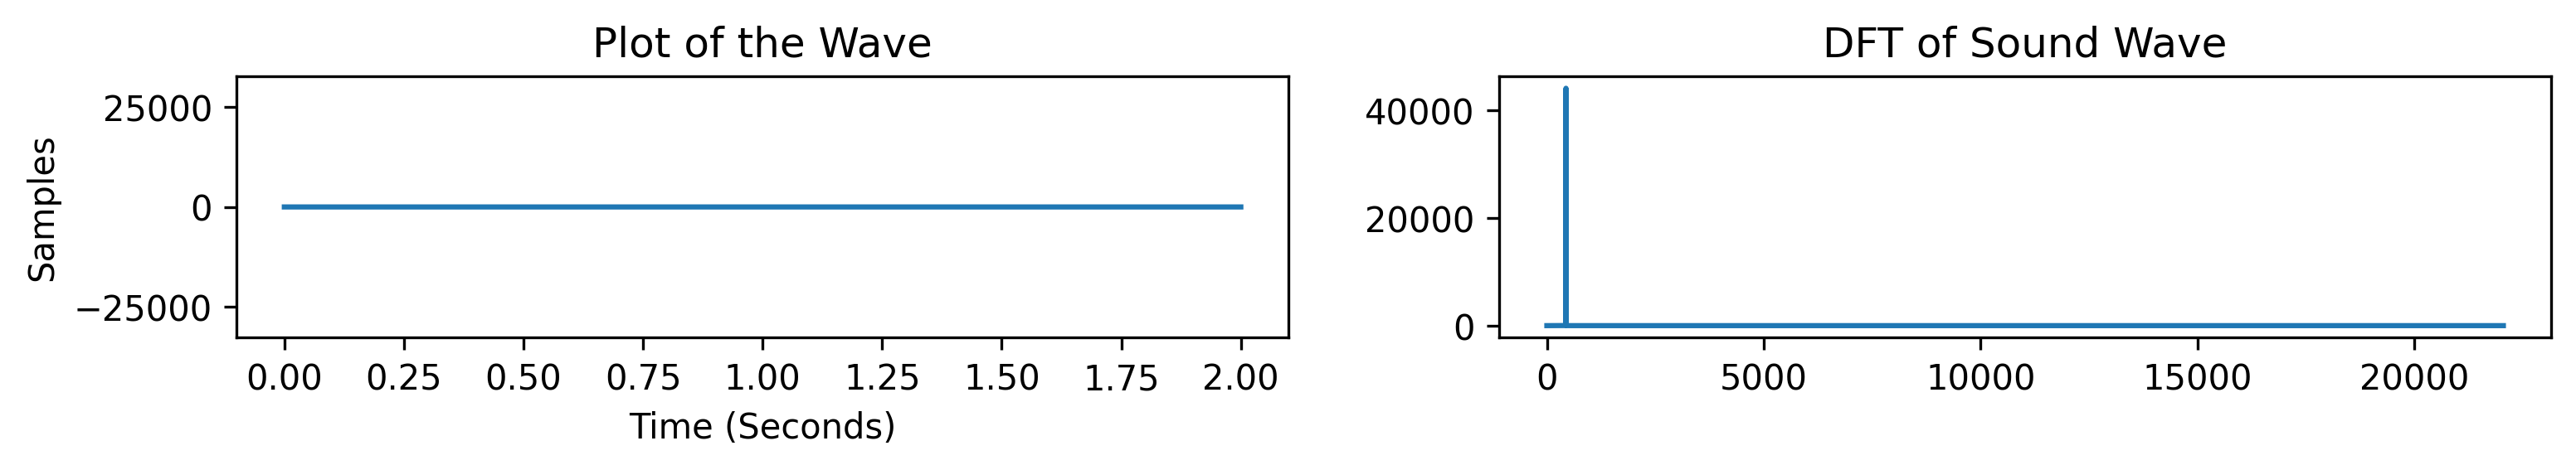

In [18]:
a_note.plot(True)

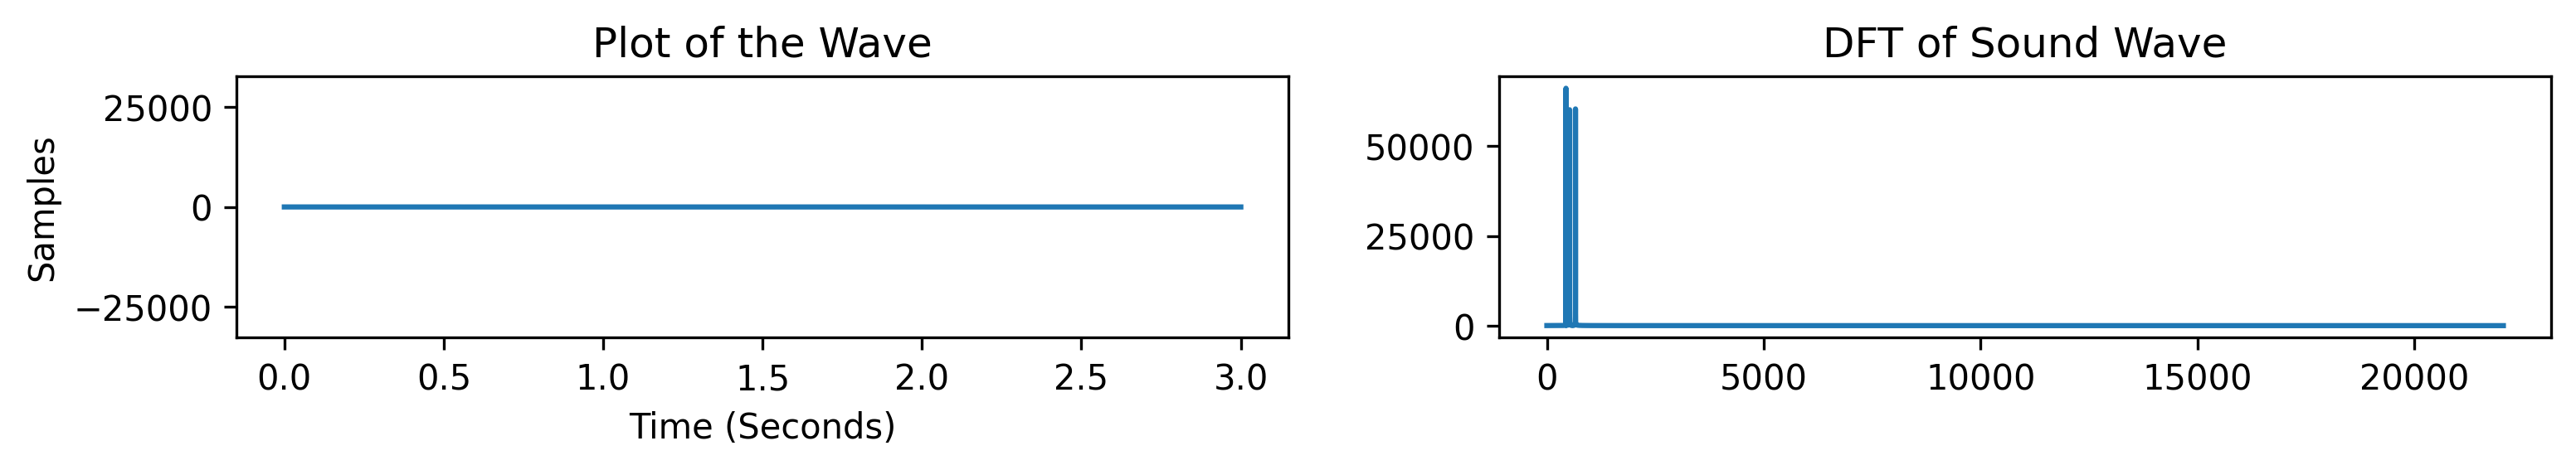

In [19]:
A_minor.plot(True)

### Problem 1.8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

In [20]:
rate, samples = wavfile.read('mystery_chord.wav')
wave = SoundWave(rate, samples)
coeff = np.abs(fft(samples)) #get coefficients
k_vals = np.argsort(coeff[:len(samples)//2])[::-1][:4] #get the largest
frequencies = rate*k_vals/len(samples) #get hertz from indexes
print('Frequencies are A,G,C,D or {}, {}, {}, {} hertz respectively.'.format(frequencies[0],frequencies[1],frequencies[2],frequencies[3]))

FileNotFoundError: [Errno 2] No such file or directory: 'mystery_chord.wav'

The notes are...

<h2 align="center">Part 2: Convolution and Filtering.</h2>

### Problem 2.1

- Implement `SoundWave.__mul__()` for circular convolution.
- Generate 2 seconds of white noise at the same sample rate as `tada.wav`.
- Compute the circular convolution of `tada.wav` and the white noise. Embed the result in the notebook.
- Append the circular convolution to itself and embed the result in the notebook.

In [21]:
rate, samples = wavfile.read('tada.wav')
tada = SoundWave(rate, samples) #generate object
# Create 2 seconds of white noise at a given rate.
noise = np.random.randint(-32767, 32767, rate*2, dtype=np.int16)
white_noise = SoundWave(rate, noise)

convo = tada * white_noise
convo = convo >> convo
IPython.display.Audio(data=convo.samples,rate=convo.rate)



FileNotFoundError: [Errno 2] No such file or directory: 'tada.wav'

### Problem 2.2

- Implement `SoundWave.__pow__()` for linear convolution.
- Time the linear convolution of `CGC.wav` and `GCG.wav` using `SoundWave.__pow__()` and `scipy.signal.fftconvolve()`.
- Embed the two original sounds and their convolutions in the notebook. Check that the convolutions with `SoundWave.__pow__()` and `scipy.signal.fftconvolve()` sound the same.

In [ ]:
rate, samples = wavfile.read('CGC.wav')
rate2, samples2 = wavfile.read('GCG.wav')
CGC = SoundWave(rate, samples) #generate object
GCG = SoundWave(rate2, samples2)

%time convo = CGC ** GCG
IPython.display.Audio(data=convo.samples,rate=convo.rate)

In [ ]:

%time fftconvo = fftconvolve(CGC,GCG)
IPython.display.Audio(data=fftconvo.samples,rate=fftconvo.rate)

### Problem 2.3

Use `SoundWave.__pow__()` or `scipy.signal.fftconvolve()` to compute the linear convolution of `chopin.wav` and `balloon.wav`.
Embed the two original sounds and their convolution in the notebook.

In [22]:
rate, samples = wavfile.read('chopin.wav')
chopin = SoundWave(rate,samples)

IPython.display.Audio(data=chopin.samples,rate=chopin.rate)

FileNotFoundError: [Errno 2] No such file or directory: 'chopin.wav'

In [23]:
rate, samples = wavfile.read('balloon.wav')
balloon = SoundWave(rate,samples)

IPython.display.Audio(data=balloon.samples,rate=balloon.rate)

FileNotFoundError: [Errno 2] No such file or directory: 'balloon.wav'

In [ ]:
chopbal = chopin ** balloon

IPython.display.Audio(data=chopbal.samples,rate=chopbal.rate)

### Problem 2.4

- Implement `SoundWave.clean()`.
- Clean `noisy1.wav` by filtering out frequencies from $1250$-$2600$ Hz. Embed the original and the cleaned versions in the notebook.
- Clean `noisy2.wav`. Embed the original and the cleaned versions in the notebook.

In [ ]:
rate,samples = wavfile.read('noisy2.wav')
noisy2 = SoundWave(rate,samples)

IPython.display.Audio(data=noisy2.samples,rate=noisy2.rate)

In [ ]:
# noisy1.plot()

DFT = fft(noisy2.samples)
# x = np.linspace(0,1,172040)


x = len(noisy2.samples)/noisy2.rate #compute the total seconds
#create domain on number of seconds divided into number of samples
domain = np.linspace(0,len(noisy2.samples),len(noisy2.samples)) 
plt.plot(domain,abs(DFT))


In [ ]:
cleaned = noisy2.clean(1300,4350)

IPython.display.Audio(data=cleaned.samples,rate=cleaned.rate)

In [ ]:
DFT = fft(noisy2.samples)
# x = np.linspace(0,1,172040)


x = len(noisy2.samples)/noisy2.rate #compute the total seconds
#create domain on number of seconds divided into number of samples
domain = np.linspace(0,len(noisy2.samples),len(noisy2.samples)) 
plt.plot(domain,abs(DFT))

### Problem 2.5

- Clean `vuvuzela.wav` by filtering bad frequencies out of the left and right channels individually.
- Recombine the left and right channels and embed the result in the notebook.

In [ ]:
rate, samples = wavfile.read('vuvuzela.wav')
org_vuvu = SoundWave(rate,samples.T)
vuvu1 = SoundWave(rate, samples.T[0])
vuvu2 = SoundWave(rate, samples.T[1])

IPython.display.Audio(data=org_vuvu.samples,rate=org_vuvu.rate)

In [ ]:
vuvu1.clean(200,500)
vuvu2.clean(200,500)

vuvu = SoundWave(rate, np.vstack((vuvu1.samples,vuvu2.samples)))

IPython.display.Audio(data=vuvu.samples,rate=vuvu.rate)

### Problem 2.6

- Clean up `license_plate.png` so that the year printed on the sticker in the bottom right corner of the plate is legible.
- Display the original and cleaned images.

In [ ]:
image = imageio.imread("license_plate.png")
# Plot the image
im_dft = fft2(image)
plt.subplot(211)
plt.imshow(image,cmap='gray')
plt.axis('off')

# Plot the magnitude of the dft
plt.subplot(212)
plt.imshow(np.log(np.abs(im_dft)), cmap="gray")
plt.axis('off')

plt.suptitle('Original')
plt.show()


In [ ]:
im_dft = fft2(image)
mean = np.mean(im_dft).real

# Patch the dft
im_dft[33:38,99:104] = np.zeros((5,5)) + (mean + 10000)
im_dft[107:114,127:134] = np.zeros((7,7)) + (mean + 1000)
im_dft[67:74,199:206] = np.zeros((7,7)) + (mean + 1000)
im_dft[143:150,228:235] = np.zeros((7,7)) + (mean + 1000)
im_dft[103:110,300:307] = np.zeros((7,7)) + (mean + 1000)
im_dft[179:184,330:335] = np.zeros((5,5)) + (mean + 5000)

#plot the altered image
plt.subplot(211)
new = ifft2(im_dft).real
plt.imshow(new,cmap='gray')
plt.axis('off')

#plot the altered dft
plt.subplot(212)
plt.imshow(np.log(np.abs(im_dft)), cmap="gray")
plt.axis('off')
plt.suptitle('Altered')
plt.show()

The year on the sticker is... 13